<a href="https://colab.research.google.com/github/joaocbjr/Learn_DataScience/blob/main/Cap5_An%C3%A1lise_de_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Análise de valores extremos usando métodos univariados
---

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn import datasets


%matplotlib inline
rcParams['figure.figsize'] = 7.5, 6

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

### Usando boxplots para identificar outliers

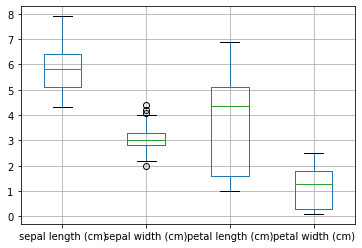

In [ ]:
df.boxplot()
plt.show()

In [ ]:
larg_cepa = df['sepal width (cm)']
iris_outliers = (larg_cepa > 4)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [ ]:
iris_outliers = (larg_cepa < 2.05)
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0


### Aplicando a identificação de outlier de Tukey

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(df['sepal width (cm)'])
sumario = X_df.describe()
print(sumario)

       sepal width (cm)
count            150.00
mean               3.06
std                0.44
min                2.00
25%                2.80
50%                3.00
75%                3.30
max                4.40


#### Calculando os limites inferior e superior do Intervalo entre quartis

In [ ]:
sumario.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
iqr = sumario.loc['75%'] - sumario.loc['25%']
iqr

sepal width (cm)   0.50
dtype: float64

In [ ]:
limite_inf = sumario.loc['25%'] - iqr * 1.5 
limite_inf

sepal width (cm)   2.05
dtype: float64

In [ ]:
limite_sup = sumario.loc['75%'] + iqr * 1.5 
limite_sup

sepal width (cm)   4.05
dtype: float64

___
## Análise Multivariada para detecção de outlier
___

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')


df = sns.load_dataset("iris")
df.columns=['comp da cepa','larg  da cepa','comp da pétala','larg da pétala', 
            'espécie']

### Inspecionando boxplots visualmente

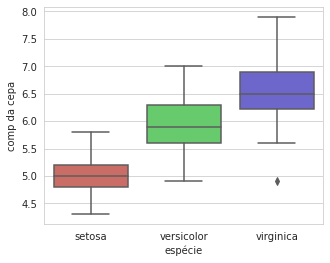

In [ ]:
sns.boxplot(x='espécie', y='comp da cepa', data=df, palette='hls')

### Olhando a matriz de scatterplots

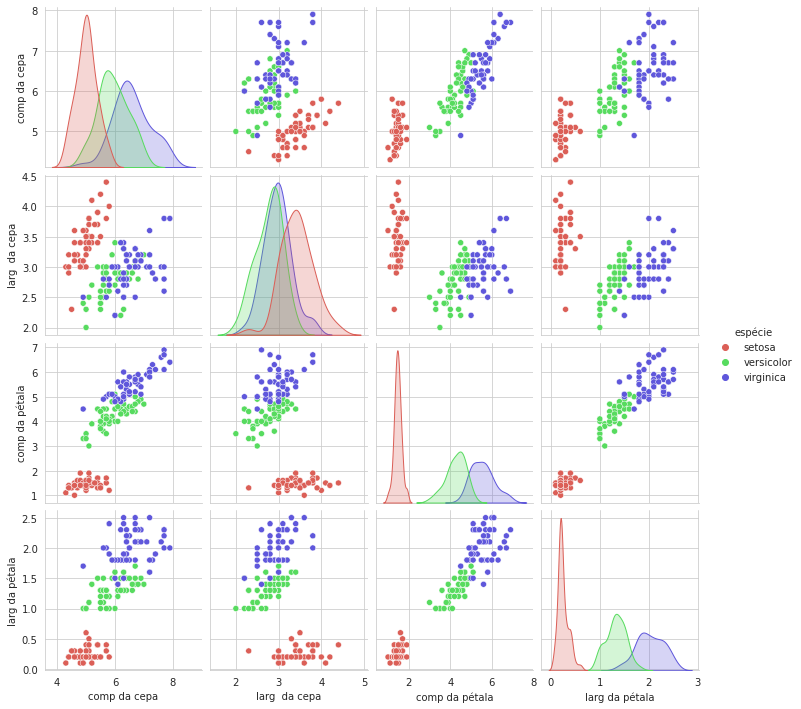

In [ ]:
sns.pairplot(df, hue='espécie', palette='hls')

___
## Usando DBSCAN
___

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 7.5, 6
sns.set_style('whitegrid')

df = sns.load_dataset("iris")
cols = ['comp da cepa','larg  da cepa','comp da pétala','larg da pétala', 
        'espécie']
df.columns = cols
X = df[cols[:3]].values
y = df['espécie'].values

#### Treinando o modelo para identificar outliers

In [ ]:
modelo = DBSCAN(eps=0.8, min_samples=19).fit(X)
print(modelo)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


#### Visualizando resultados

In [ ]:
outliers_df = pd.DataFrame(X)

print(Counter(modelo.labels_))

print(outliers_df[modelo.labels_ ==-1])

Counter({1: 95, 0: 50, -1: 5})
       0    1    2
105 7.60 3.00 6.60
117 7.70 3.80 6.70
118 7.70 2.60 6.90
122 7.70 2.80 6.70
131 7.90 3.80 6.40


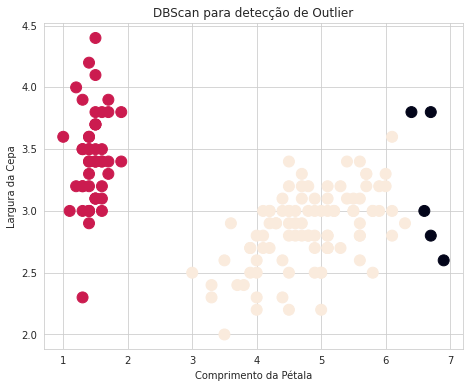

In [ ]:
cores = modelo.labels_

plt.scatter(X[:,2], X[:,1], c=cores, s=120)
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Cepa')
plt.title('DBScan para detecção de Outlier')
plt.show()